# GPS measurement filtering
Given, series of noisy data on measurements on 1D postion of robot from GPS in the file attached with this exercise.

Your task is to obtain GPS measurement using least squares and verify if this is equivalent to MLE

We will choose a linear measurement model:

$y = Hx + v$

Where,
$y$ is the measurement vector (to be read from the file)

$x$ is the estimated value from several measurements (m)

$v$ is the measurement noise

However, the underlying data is not strictly gaussian and it is known to have some outliers due to residual calibration errors

From earlier experiments, you know that gps measurements for the particular location should be $\sim$ 10m and it can be off by a maximum of $\pm$ 1.5 m

You have to first "preprocess" data by filtering outliers using a suitable criteria

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
from scipy import stats
import matplotlib.pyplot as plt
from math import sqrt, pi

In [5]:
# Read Create a numpy array for measurement vector Y
filepath = 'data/gpsMeasurements.txt'
# Your code here
gps_data = np.loadtxt(filepath)
gps_data_rnd = np.around(gps_data,decimals=1)
#print(Y_rounded)

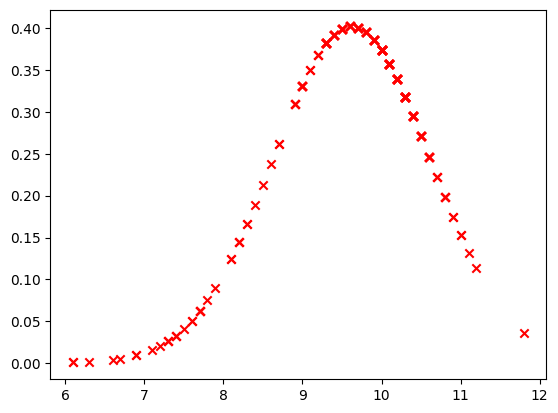

In [7]:
# Fit a gaussian to the data and plot the distribution -> py
axis_temp = np.zeros(gps_data.shape)
#plt.scatter(Y, axis_temp, color='r', marker='x', label='data')
#plt.grid()

# Your code here
data_size = np.size(gps_data)
x, y = np.meshgrid(np.linspace(gps_data.min(), gps_data.max(), data_size), np.linspace(gps_data.min(),gps_data.max(), data_size))

# Guassian plot
# Calculating mean and standard deviation
mean_y = statistics.mean(gps_data_rnd)
sd_y = statistics.stdev(gps_data_rnd) 
norm.pdf(gps_data_rnd, mean_y, sd_y)
#print("norm pdf {}".format(norm.pdf(Y_rounded, mean_y, sd_y)))
plt.scatter(gps_data_rnd, norm.pdf(gps_data_rnd, mean_y, sd_y),color='r', marker='x', label='data')
plt.show()

In [8]:
# Formulate Least Square solution
# Create H matrix and find least square solution on unfiltered data
H = np.ones((np.size(gps_data),1))
# Your code here
np.linalg.lstsq(H,gps_data)

C:\Users\maile\AppData\Local\Temp\ipykernel_11700\3678589816.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(H,gps_data)


(array([9.62070684]), array([245.04904253]), 1, array([15.8113883]))

In [9]:
# Because "expected" value for measurement and max range for error is known, filter outliers using a suitable criteria
# Your code here
# Y_filt = list()
gps_threshold = 10
gps_offset = 1.5
data_filt_list = []
for data in gps_data:
    if((data>float(gps_threshold-gps_offset)) and (data<float(gps_threshold+gps_offset))):
        data_filt_list.append(data)
data_filt = np.array(data_filt_list)
print(data_filt.size)

217


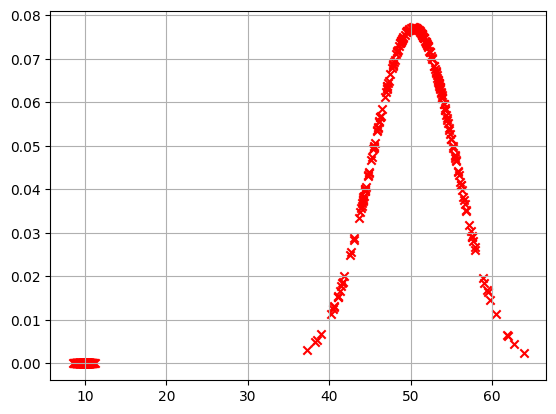

In [10]:
##### Redraw gaussian on filtered data -> pyfilt
# Find the new MLE
gps_filt = np.array(data_filt)
axis_temp = np.zeros(gps_filt.shape)
plt.scatter(gps_filt, axis_temp, color='r', marker='x', label='data')
plt.grid()

# Your code here
log_y = stats.norm.logpdf(gps_filt)
neg_log_y = log_y*-1
mean_nl = statistics.mean(neg_log_y)
sd_nl = statistics.stdev(neg_log_y) 
norm.pdf(neg_log_y, mean_nl, sd_nl)
#print("norm pdf {}".format(norm.pdf(Y_rounded, mean_y, sd_y)))
plt.scatter(neg_log_y, norm.pdf(neg_log_y, mean_nl, sd_nl),color='r', marker='x', label='data')
plt.show()

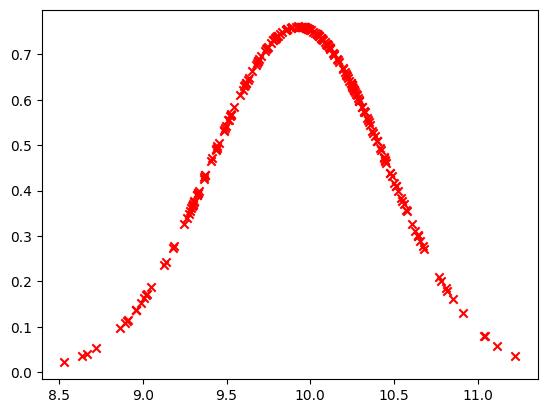

In [12]:
# Recalculate the new least square solution -> it should be the same as MLE
mean_filt = statistics.mean(gps_filt)
sd_filt = statistics.stdev(gps_filt) 
norm.pdf(gps_data_rnd, mean_y, sd_y)
#print("norm pdf {}".format(norm.pdf(Y_rounded, mean_y, sd_y)))
plt.scatter(gps_filt, norm.pdf(gps_filt, mean_filt, sd_filt),color='r', marker='x', label='data')
plt.show()

In [13]:
def gaussian_1d(x, mu, std):
    return (1 / (sqrt(2 * pi) * std)) * np.exp(-(x - mu) ** 2 / (2 * std ** 2))

In [26]:
gaus_1d_mle = []
for i in range(len(gps_filt)):
    gaus_1d_mle.append(gaussian_1d(gps_filt[i],mean_filt,sd_filt))
gps_gaus = np.array(gaus_1d_mle)    
gps_gaus

array([0.56623322, 0.43947928, 0.04146228, 0.71421788, 0.75597206,
       0.36204419, 0.21041103, 0.73574104, 0.75849626, 0.6843814 ,
       0.36962824, 0.20055661, 0.63662723, 0.7581893 , 0.64435155,
       0.3545027 , 0.68697509, 0.47240107, 0.65253823, 0.27250872,
       0.31158698, 0.49471602, 0.50894369, 0.74980873, 0.72523943,
       0.74114393, 0.75940202, 0.46455509, 0.7485542 , 0.42914817,
       0.43868366, 0.41035289, 0.71144739, 0.62995924, 0.51906718,
       0.16125946, 0.18683373, 0.62042623, 0.11488242, 0.492258  ,
       0.74458826, 0.27783144, 0.63768949, 0.76115597, 0.37019202,
       0.37744196, 0.69012336, 0.54378081, 0.74735406, 0.43336041,
       0.41754297, 0.39375666, 0.55997832, 0.75795267, 0.58404625,
       0.75586464, 0.39910937, 0.74000203, 0.49468186, 0.58408943,
       0.34905758, 0.53402335, 0.7418211 , 0.7593939 , 0.74357285,
       0.74450156, 0.62903941, 0.75692967, 0.48921607, 0.60357537,
       0.6371828 , 0.62503842, 0.65513121, 0.57480358, 0.58373

In [23]:
len(gps_filt)

217